In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import numpy as np
poly = np.array([[0,2],
                 [3,5],
                 [5.5,4.5],
                 [6,5],
                 [8,4],
                 [10,0],
                 [12,1],
                 [13,0],
                 [14,5]
                ],dtype='double');
#poly = poly0

In [67]:
import math
#from http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html
def point_line_distance(x0,y0,x1,y1,x2,y2):
    return abs((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)) / math.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

print point_line_distance(1,3,1,2,2,3)
print point_line_distance(0,0,-2,0,0,-2)

def point_point_distance(x1,y1,x2,y2):
    dx = x2-x1
    dy = y2-y1
    return math.sqrt(dx*dx+dy*dy)


0.707106781187
1.41421356237


''

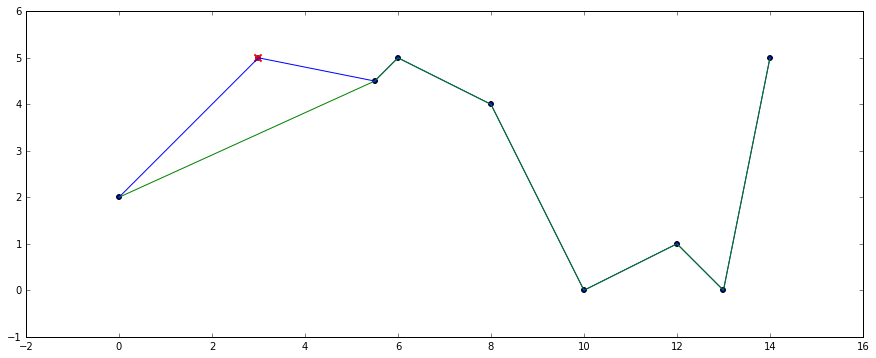

In [113]:
def simplify_opheim(tolerance,maxdist,p,step=-1):
    mask = np.ones(len(p),dtype='bool')
    marker = np.array([],dtype='double')
    first = 0
    second = 1
    third = 2
    
    marker = np.array([p[first],p[second]],dtype='double')
    
    if step == -1:
        maxstep = len(p)
    else:
        maxstep = min(step,len(p))

    for i in range(0,min(step,len(p)-2)):
        ldist = point_line_distance(p[third,0],p[third,1],p[first,0],p[first,1],p[second,0],p[second,1])
        pdist = point_point_distance(p[third,0],p[third,1],p[first,0],p[first,1])
        if ldist <= tolerance and pdist < maxdist:
            mask[second] = False
            second = third
            third = third+1 
        else:
            first = second
            second = third
            third = third+1
    marker = np.array([p[first],p[second]],dtype='double')
    return mask,marker

mask,_ = simplify_opheim(2.7,6.9,poly,1)

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')

#the original polygon
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

#simplified polygon
simplified = poly[mask]
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])

#deleted points
deleted = poly[np.logical_not(mask)]
plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)
;

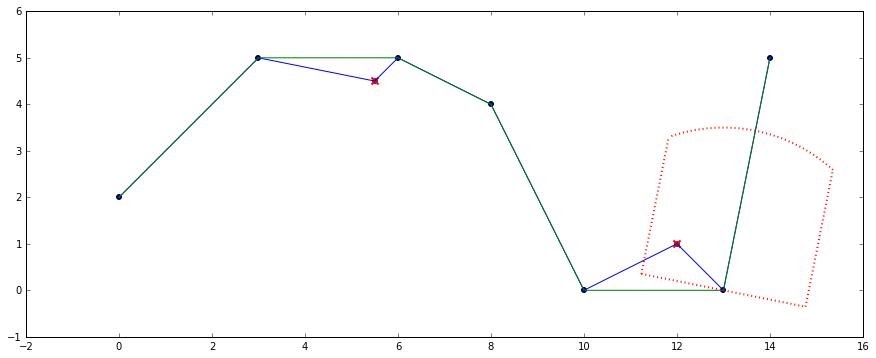

In [111]:
def plotpoly(tolerance,maxdist,step):
    mask,marker = simplify_opheim(tolerance,maxdist,poly,step)

    #figure
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #the original polygon
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])

    #simplified polygon
    simplified = poly[mask]
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)
    
    #marker depending on step
    if len(marker)>1:
        vec = marker[1]-marker[0]
        len1vec = vec / math.sqrt(np.dot(vec,vec))
        tm = math.asin(tolerance / maxdist)

        normvec = np.array([-len1vec[1],len1vec[0]])  
        left = marker[0]+ tolerance*normvec
        p1 = left
        p2 = left+len1vec*maxdist*math.cos(tm)
        line = np.array([p1,p2])
        l = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(l)

        angle = math.degrees(math.atan(vec[1]/vec[0]))
        tmd = math.degrees(tm)
        mintheta = -tmd
        maxtheta = tmd
        maxc = patches.Arc((marker[0,0],marker[0,1]),maxdist*2.0,maxdist*2.0,angle,mintheta,maxtheta,linestyle=':',fill=False,color='red',linewidth=2.0)
        fig.gca().add_artist(maxc)

        right = marker[0]- tolerance*normvec
        p1 = right
        p2 = right+len1vec*maxdist*math.cos(tm)
        line = np.array([p1,p2])
        r = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(r)

        line = np.array([left,right])
        m = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(m)
from IPython.html.widgets import *
interact(plotpoly, tolerance=(0,10,0.1),maxdist=(0,12,0.1),step=(0,10,1));